# Purpose: input raw data files from Kaggle and output cleaned data file as csv format for analysis in later parts. 

This is to ensure that we do not have to redo the data cleaning steps everytime we perform data analysis

## Import packages

In [1]:
import pandas as pd
import numpy as np
import glob
import re
import os
import fitz
import math
from textblob import TextBlob
from langdetect import detect

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Lu
[nltk_data]     Xinyi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#read data
trump = pd.read_csv('data/hashtag_donaldtrump.csv', lineterminator='\n')
biden = pd.read_csv('data/hashtag_joebiden.csv', lineterminator='\n')

In [3]:
trump.head()

created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   
3  2020-10-15 00:00:02  1.316529e+18   
4  2020-10-15 00:00:08  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   
3  2 hours since last tweet from #Trump! Maybe he...    0.0            0.0   
4  You get a tie! And you get a tie! #Trump ‘s ra...    4.0            3.0   

               source       user_id              user_name user_screen_name  \
0           TweetDeck  3.606665e+08     El Sol Latino News  elsollatinonews   
1    Social Mediaset   3.316176e+08                Tgcom24  MediasetTgcom24   
2     Twitter Web App  8.436472e+06                 snarke           snarke   
3       Trumpytweeter  8.283556e+17          Trumpytweeter    trumpytweeter   
4  Twitter for iPhone  4.741380e+07  Rana Abtar - رنا أبتر        Ranaabtar   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,...  ...   
3  If he doesn't tweet for some time, should we b...  ...   
4  Washington Correspondent, Lebanese-American ,c...  ...   

  user_followers_count                 user_location        lat        long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.774270  -80.193660   
1            1067661.0                           NaN        NaN         NaN   
2               1185.0                      Portland  45.520247 -122.674195   
3                 32.0                           NaN        NaN         NaN   
4               5393.0                 Washington DC  38.894992  -77.036558   

         city                   country      continent                 state  \
0         NaN  United States of America  North America               Florida   
1         NaN                       NaN            NaN                   NaN   
2    Portland  United States of America  North America                Oregon   
3         NaN                       NaN            NaN                   NaN   
4  Washington  United States of America  North America  District of Columbia   

  state_code                   collected_at  
0         FL            2020-10-21 00:00:00  
1        NaN  2020-10-21 00:00:00.373216530  
2         OR  2020-10-21 00:00:00.746433060  
3        NaN  2020-10-21 00:00:01.119649591  
4         DC  2020-10-21 00:00:01.492866121  

[5 rows x 21 columns]

In [4]:
biden.head()

created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   
2  2020-10-15 00:00:20  1.316529e+18   
3  2020-10-15 00:00:21  1.316529e+18   
4  2020-10-15 00:00:22  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...    0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...    0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...    1.0            0.0   

               source       user_id           user_name user_screen_name  \
0           TweetDeck  3.606665e+08  El Sol Latino News  elsollatinonews   
1    Twitter for iPad  8.099044e+08         Cheri A. 🇺🇸     Biloximeemaw   
2     Twitter Web App  3.494182e+09          Flag Waver      Flag_Wavers   
3  Twitter for iPhone  8.242596e+17       Michelle Ferg    MichelleFerg4   
4     Twitter Web App  1.032807e+18      the Gold State    theegoldstate   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4  A Silicon Valley #independent #News #Media #St...  ...   

  user_followers_count                 user_location        lat        long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.774270  -80.193660   
1               6628.0                           NaN        NaN         NaN   
2               1536.0         Golden Valley Arizona  46.304036 -109.171431   
3                 27.0                           NaN        NaN         NaN   
4                390.0               California, USA  36.701463 -118.755997   

   city                   country      continent       state state_code  \
0   NaN  United States of America  North America     Florida         FL   
1   NaN                       NaN            NaN         NaN        NaN   
2   NaN  United States of America  North America     Montana         MT   
3   NaN                       NaN            NaN         NaN        NaN   
4   NaN  United States of America  North America  California         CA   

                    collected_at  
0            2020-10-21 00:00:00  
1  2020-10-21 00:00:00.517827283  
2  2020-10-21 00:00:01.035654566  
3  2020-10-21 00:00:01.553481849  
4  2020-10-21 00:00:02.071309132  

[5 rows x 21 columns]

In [5]:
trump.shape

(970919, 21)

In [6]:
biden.shape

(776886, 21)

In [7]:
trump.dtypes

created_at               object
tweet_id                float64
tweet                    object
likes                   float64
retweet_count           float64
source                   object
user_id                 float64
user_name                object
user_screen_name         object
user_description         object
user_join_date           object
user_followers_count    float64
user_location            object
lat                     float64
long                    float64
city                     object
country                  object
continent                object
state                    object
state_code               object
collected_at             object
dtype: object

In [8]:
trump.country.unique()

array(['United States of America', nan, 'United Kingdom', 'Germany',
       'United States', 'Australia', 'Costa Rica', 'Barbados', 'Cameroon',
       'The Netherlands', 'Mexico', 'Canada', 'France', 'Peru',
       'Argentina', 'South Korea', 'Finland', 'Mongolia', 'India',
       'Japan', 'Turkey', 'Switzerland', 'Iran', 'Portugal', 'Ireland',
       'Russia', 'Greece', 'Egypt', 'Ecuador', 'Colombia', 'Sri Lanka',
       'Italy', 'China', 'Malaysia', 'Indonesia', 'Venezuela', 'Thailand',
       'Sweden', 'Nepal', 'Bangladesh', 'Philippines',
       'Dominican Republic', 'New Zealand', 'Chile', 'Honduras',
       'Azerbaijan', 'Georgia', 'Spain', 'Cyprus', 'Morocco',
       'Netherlands', 'Saudi Arabia', 'Norway', 'Singapore', 'Cuba',
       'Niger', 'Hungary', 'Greenland', 'United Arab Emirates', 'Brazil',
       'Uganda', 'Guatemala', 'Pakistan', 'Taiwan', 'Qatar',
       'Afghanistan', 'South Africa', 'Nigeria', 'Slovakia', 'Guyana',
       'Kenya', 'Iraq', 'Denmark', 'Uruguay', 'Be

In [9]:
trump.continent.unique()

array(['North America', nan, 'Europe', 'Oceania', 'Africa',
       'South America', 'Asia', 'Antarctica'], dtype=object)

In [10]:
biden.continent.unique()

array(['North America', nan, 'Europe', 'Asia', 'Africa', 'Oceania',
       'South America', 'Antarctica'], dtype=object)

In [85]:
import emoji

def CleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text) #remove urls
    text = re.sub(r'[^\w]', ' ', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U0001F1F2-\U0001F1F4"  # Macau flag
        u"\U0001F1E6-\U0001F1FF"  # flags
        u"\U0001F600-\U0001F64F"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F620"
        u"\u200d"
        u"\u2640-\u2642"
        "]+", flags=re.UNICODE)
    
    text = emoji_pattern.sub(r'', text)
    text = text.lower()
    return text

def CleanData(data):
    df = data.copy()
    
    #only filter for english tweets
    for index, row in df.iterrows():
        try:
            language = detect(row['tweet'])
        except:
            language = 'error'
        df.loc[index, 'tweet_lang'] = language
        
    df = df[df['tweet_lang'] == 'en']
    
    #drop rows with NA country as we want to analyse by country
    df = df.dropna(subset=['country'])

    #convert column to datetime types
    date_cols = ['created_at', 'user_join_date', 'collected_at']
    numeric_cols = ['tweet_id', 'likes', 'retweet_count', 'user_id','user_followers_count']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col])
    for col in numeric_cols:
        df[col] = df[col].astype(int)
    
    #clean up country names
    df['country'] = df['country'].replace('United States of America', 'United States')
    df = df.reset_index(drop = True)
    
    #filter for tweets from the US
    df = df[df['country'] == 'United States']
    
    #drop irrelevant columns
    df = df.drop(columns = ['tweet_id', 'source', 'user_name', 'user_screen_name', 'user_description', 'user_join_date', 'collected_at'])
    #clean up tweets
    #remove punctuation and numbers
#     punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
#     for index, row in df.iterrows():
#         tweet = row['tweet']
#         tweet = ''.join([char for char in tweet if char not in punctuation])
#         tweet = re.sub('[0-9]+', '', tweet)
#         df.loc[index, 'tweet_new'] = tweet
    df['tweet_new'] = df['tweet'].apply(CleanText)
    
    #tokenization
    df['tweet_token'] = df['tweet_new'].apply(lambda x: re.split('\W+', x))
    
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    df['tweet_token'] = df['tweet_token'].apply(lambda x: [word for word in x if word not in stopwords])
    
    #stemming and lemmatization
    ps = nltk.PorterStemmer()
    wn = nltk.WordNetLemmatizer()
    df['tweet_token'] = df['tweet_token'].apply(lambda x: [ps.stem(word) for word in x])
    df['tweet_token'] = df['tweet_token'].apply(lambda x: [wn.lemmatize(word) for word in x])
    return df

In [40]:
%%time
sample_trump = trump.iloc[:10000, :]
trump_cleaned = CleanData(sample_trump)
trump_cleaned.head()

Wall time: 1min 20s


created_at                                              tweet  \
0 2020-10-15 00:00:02  #Trump: As a student I used to hear for years,...   
1 2020-10-15 00:00:08  You get a tie! And you get a tie! #Trump ‘s ra...   
2 2020-10-15 00:00:17  @CLady62 Her 15 minutes were over long time ag...   
3 2020-10-15 00:00:18  @DeeviousDenise @realDonaldTrump @nypost There...   
4 2020-10-15 00:00:20  One of the single most effective remedies to e...   

   likes  retweet_count     user_id  user_followers_count      user_location  \
0      2              1     8436472                  1185           Portland   
1      4              3    47413798                  5393      Washington DC   
2      2              0  1138416104                  2363  Perris,California   
3      0              0 -2147483648                   766          Ohio, USA   
4      0              0   540476889                   151  Pennsylvania, USA   

         lat        long        city        country      continent  \
0  45.520247 -122.674195    Portland  United States  North America   
1  38.894992  -77.036558  Washington  United States  North America   
2  33.782519 -117.228648         NaN  United States  North America   
3  40.225357  -82.688140         NaN  United States  North America   
4  40.969989  -77.727883         NaN  United States  North America   

                  state state_code tweet_lang  \
0                Oregon         OR         en   
1  District of Columbia         DC         en   
2            California         CA         en   
3                  Ohio         OH         en   
4          Pennsylvania         PA         en   

                                           tweet_new  \
0  trump  as a student i used to hear for years  ...   
1  you get a tie  and you get a tie  trump  s ral...   
2   her 15 minutes were over long time ago  omaro...   
3     there won t be many of them   unless you al...   
4  one of the single most effective remedies to e...   

                                         tweet_token  
0  [trump, student, use, hear, year, ten, year, h...  
1         [get, tie, get, tie, trump, ralli, iowa, ]  
2  [, 15, minut, long, time, ago, omarosa, never,...  
3  [, mani, unless, vote, god, prevail, bo, corru...  
4  [one, singl, effect, remedi, erad, anoth, roun...

In [41]:
%%time
sample_biden = biden.iloc[:10000, :]
biden_cleaned = CleanData(sample_biden)
biden_cleaned.head()

Wall time: 1min 40s


created_at                                              tweet  \
0 2020-10-15 00:00:20  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...   
1 2020-10-15 00:00:22  #censorship #HunterBiden #Biden #BidenEmails #...   
2 2020-10-15 00:00:25  In 2020, #NYPost is being #censorship #CENSORE...   
3 2020-10-15 00:00:57  FBI Allegedly Obtained Hunter Biden Computer, ...   
4 2020-10-15 00:01:23  Comments on this? "Do Democrats Understand how...   

   likes  retweet_count     user_id  user_followers_count  \
0      0              0 -2147483648                  1536   
1      1              0 -2147483648                   390   
2      0              0    19940334                  1397   
3      0              0 -2147483648                   266   
4      0              0   101659277                    83   

           user_location        lat        long     city        country  \
0  Golden Valley Arizona  46.304036 -109.171431      NaN  United States   
1        California, USA  36.701463 -118.755997      NaN  United States   
2      Chicago, Illinois  41.875562  -87.624421  Chicago  United States   
3          Kentucky, USA  37.572603  -85.155141      NaN  United States   
4         Tampa, Florida  27.947760  -82.458444    Tampa  United States   

       continent       state state_code tweet_lang  \
0  North America     Montana         MT         en   
1  North America  California         CA         en   
2  North America    Illinois         IL         en   
3  North America    Kentucky         KY         en   
4  North America     Florida         FL         en   

                                           tweet_new  \
0     this is how biden made his   trumpisnotamer...   
1  censorship hunterbiden biden bidenemails biden...   
2  in 2020  nypost is being censorship censored b...   
3  fbi allegedly obtained hunter biden computer  ...   
4  comments on this   do democrats understand how...   

                                         tweet_token  
0               [, biden, made, trumpisnotamerica, ]  
1  [censorship, hunterbiden, biden, bidenemail, b...  
2  [2020, nypost, censorship, censor, twitter, ma...  
3  [fbi, allegedli, obtain, hunter, biden, comput...  
4  [comment, democrat, understand, ruthless, chin...

In [42]:
print(trump_cleaned.shape, biden_cleaned.shape)

(4274, 17) (3895, 17)


In [43]:
#concat both
trump_cleaned['ds'] = 'trump'
biden_cleaned['ds'] = 'biden'

# Combine the filtered on United States Trump and Biden Datasets 
tweets_df = pd.concat([biden_cleaned, trump_cleaned],ignore_index=True)

tweets_df.shape

(8169, 18)

In [44]:
tweets_df.to_csv('sample_cleaned.csv', index=False)

### Sampling: 10000 rows from each week before the election

In [87]:
#split into 3 periods, excluding election day
#1st week: Oct 15 - Oct 19
#2nd week: Oct 20 - Oct 26
#3rd week: Oct 27 - Nov 2
trump_1 = trump.loc[trump['created_at'] < '2020-10-20']
trump_2 = trump.loc[(trump['created_at'] > '2020-10-20') & (trump['created_at'] < '2020-10-27')]
trump_3 = trump.loc[(trump['created_at'] > '2020-10-27') & (trump['created_at'] < '2020-11-03')]
print(trump_1.shape, trump_2.shape, trump_3.shape)

(97476, 21) (169693, 21) (191016, 21)


In [32]:
#save to excel file so that we can plot distribution
# trump_1.to_excel('trump_week1.xlsx')
# trump_2.to_excel('trump_week2.xlsx')
# trump_3.to_excel('trump_week3.xlsx')

In [88]:
#split into 3 periods, excluding election day
#1st week: Oct 15 - Oct 19
#2nd week: Oct 20 - Oct 26
#3rd week: Oct 27 - Nov 2
biden_1 = biden.loc[biden['created_at'] < '2020-10-20']
biden_2 = biden.loc[(biden['created_at'] > '2020-10-20') & (biden['created_at'] < '2020-10-27')]
biden_3 = biden.loc[(biden['created_at'] > '2020-10-27') & (biden['created_at'] < '2020-11-03')]
print(biden_1.shape, biden_2.shape, biden_3.shape)

(65523, 21) (129037, 21) (116615, 21)


In [34]:
# #save to excel file so that we can plot distribution
# biden_1.to_excel('biden_week1.xlsx')
# biden_2.to_excel('biden_week2.xlsx')
# biden_3.to_excel('biden_week3.xlsx')

In [89]:
%%time
trump_1 = trump_1.sample(n = 10000)
trump_1 = CleanData(trump_1)
trump_1.head()

Wall time: 2min 51s


created_at                                              tweet  \
0 2020-10-18 20:45:17  @latimes #trump tried to be extra #orange toda...   
1 2020-10-17 21:39:15  #Trump mocks #Biden at rally about using notes...   
3 2020-10-16 01:51:36  #Trump evasive as usual—saying “possibly I did...   
4 2020-10-15 00:48:02  @JackPosobiec It would be nice if he would act...   
5 2020-10-16 22:56:51  "Why Do #White #Christians Vote #Republican, W...   

   likes  retweet_count     user_id  user_followers_count      user_location  \
0      0              0    74664635                   205    California, USA   
1      0              0  1938571818                   110              Texas   
3      0              0   410941088                  1973      Virginia, USA   
4      0              0   186467957                  1676    Los Angeles, CA   
5      0              0  1122821040                  2873  Atlantic City, NJ   

         lat        long           city        country      continent  \
0  36.701463 -118.755997            NaN  United States  North America   
1  31.816038  -99.512099            NaN  United States  North America   
3  37.123224  -78.492772            NaN  United States  North America   
4  34.053691 -118.242766    Los Angeles  United States  North America   
5  39.364285  -74.422935  Atlantic City  United States  North America   

        state state_code tweet_lang  \
0  California         CA         en   
1       Texas         TX         en   
3    Virginia         VA         en   
4  California         CA         en   
5  New Jersey         NJ         en   

                                           tweet_new  \
0   trump tried to be extra orange today since he...   
1  trump mocks biden at rally about using notes a...   
3  trump evasive as usual saying  possibly i did ...   
4   it would be nice if he would actually go afte...   
5   why do white christians vote republican  whil...   

                                         tweet_token  
0  [, trump, tri, extra, orang, today, sinc, go, ...  
1  [trump, mock, biden, ralli, use, note, read, s...  
3  [trump, evas, usual, say, possibl, possibl, bi...  
4  [, would, nice, would, actual, go, twitter, fa...  
5  [, white, christian, vote, republican, black, ...

In [90]:
trump_1.shape

(3077, 17)

In [91]:
%%time
trump_2 = trump_2.sample(n = 10000)
trump_2 = CleanData(trump_2)
trump_2.head()

Wall time: 3min 42s


created_at                                              tweet  \
0 2020-10-23 01:51:42  @StaceyBell_Lynn No he isn't.  Don't listen to...   
2 2020-10-22 16:10:59  @sarahcpr #LeslieStahl grabbed #DonaldTrump by...   
4 2020-10-21 07:59:26  @funder @MeredthSalenger @MaryLTrump What I wi...   
7 2020-10-24 08:41:34  We aren't going to get this virus under contro...   
8 2020-10-22 23:07:20  #Trump just handed Biden a devastating debate ...   

   likes  retweet_count     user_id  user_followers_count  \
0      0              0 -2147483648                   206   
2      0              0    41596521                    65   
4      0              0   112877659                    24   
7      1              1   182781523                  1625   
8      0              0 -2147483648                 10490   

                          user_location        lat        long       city  \
0                        Long Beach, NY  40.588512  -73.657861        NaN   
2                              Maryland  39.516223  -76.938207        NaN   
4                          Erlanger, KY  39.016728  -84.600777        NaN   
7                         Elk Grove, CA  38.408799 -121.371618        NaN   
8  Las Vegas • New York • International  36.150890 -115.157771  Las Vegas   

         country      continent       state state_code tweet_lang  \
0  United States  North America    New York         NY         en   
2  United States  North America    Maryland         MD         en   
4  United States  North America    Kentucky         KY         en   
7  United States  North America  California         CA         en   
8  United States  North America      Nevada         NV         en   

                                           tweet_new  \
0  _lynn no he isn t   don t listen to the lyin k...   
2   lesliestahl grabbed donaldtrump by the pussy ...   
4     what i wish biden would say in a debate tru...   
7  we aren t going to get this virus under contro...   
8  trump just handed biden a devastating debate a...   

                                         tweet_token  
0            [_lynn, listen, lyin, king, aka, trump]  
2  [, lesliestahl, grab, donaldtrump, pussi, turn...  
4  [, wish, biden, would, say, debat, trumpmeltdo...  
7  [go, get, viru, control, unless, shut, everyth...  
8  [trump, hand, biden, devast, debat, attack, ob...

In [92]:
%%time
trump_3 = trump_3.sample(n = 10000)
trump_3 = CleanData(trump_3)
trump_3.head()

Wall time: 2min 19s


created_at                                              tweet  \
1 2020-10-31 21:16:36  @Scaramucci Those ppl that claim @JoeBiden is ...   
2 2020-11-01 00:13:55  @PamBondi @realDonaldTrump @TeamTrump @TrumpWo...   
5 2020-10-28 06:41:06  NOT “Rounding the Bend on #COVID19”\n\nClaim i...   
6 2020-11-02 19:46:48  #Trump #ElectionDay #thehammer #scorecard #USE...   
7 2020-10-30 11:28:33  Get up!\nGet out!\nVote for #Trump to save Ame...   

   likes  retweet_count     user_id  user_followers_count  \
1      0              0 -2147483648                    60   
2      2              0   201969761                    11   
5      0              0 -2147483648                   131   
6      0              0 -2147483648                  5480   
7      0              0 -2147483648                   215   

            user_location        lat        long             city  \
1  Vancouver, Washington   45.630695 -122.674456        Vancouver   
2                 Florida  27.756767  -81.463983              NaN   
5       Pennsylvania, USA  40.969989  -77.727883              NaN   
6              Texas, USA  31.816038  -99.512099              NaN   
7     West Palm Beach, FL  26.715364  -80.053294  West Palm Beach   

         country      continent         state state_code tweet_lang  \
1  United States  North America    Washington         WA         en   
2  United States  North America       Florida         FL         en   
5  United States  North America  Pennsylvania         PA         en   
6  United States  North America         Texas         TX         en   
7  United States  North America       Florida         FL         en   

                                           tweet_new  \
1   those ppl that claim  is socialist  that they...   
2      is that don jr on cocaine  at least the bi...   
5  not  rounding the bend on covid19   claim is s...   
6  trump electionday thehammer scorecard uselecti...   
7  get up  get out  vote for trump to save americ...   

                                         tweet_token  
1  [, ppl, claim, socialist, r, fight, social, vo...  
2  [, jr, cocain, least, biden, honest, h, b, pri...  
5  [round, bend, covid19, claim, simpli, true, sa...  
6  [trump, electionday, thehamm, scorecard, usele...  
7           [get, get, vote, trump, save, america, ]

In [93]:
%%time
biden_1 = biden_1.sample(n = 10000)
biden_1 = CleanData(biden_1)
biden_1.head()

Wall time: 2min 29s


created_at                                              tweet  \
0 2020-10-19 17:52:53  @cnnbrk Not even sure I can watch... same disa...   
2 2020-10-16 00:23:00  @Huff_FlyNavy The Democrat Socialists at Twitt...   
3 2020-10-16 01:06:08  #Biden - would stop subsidizing #oil. It is ab...   
4 2020-10-19 04:28:14  📣 New Podcast! "October Surprise (Ep. 279)" on...   
5 2020-10-16 00:53:13  #Biden is coherent and actually gives answers ...   

   likes  retweet_count    user_id  user_followers_count     user_location  \
0      0              0   28349796                    12     Illinois, USA   
2      2              5   27789999                116842          Arkansas   
3      2              0  372798512                  1155  Washington, D.C.   
4      0              0   21213375                  1278       Los Angeles   
5      0              0   22132232                   701     United States   

         lat        long         city        country      continent  \
0  40.079661  -89.433729          NaN  United States  North America   
2  35.204888  -92.447911          NaN  United States  North America   
3  38.894992  -77.036558   Washington  United States  North America   
4  34.053691 -118.242766  Los Angeles  United States  North America   
5  39.783730 -100.445882          NaN  United States  North America   

                  state state_code tweet_lang  \
0              Illinois         IL         en   
2              Arkansas         AR         en   
3  District of Columbia         DC         en   
4            California         CA         en   
5                   NaN        NaN         en   

                                           tweet_new  \
0   not even sure i can watch    same disaster di...   
2  _flynavy the democrat socialists at twitter ha...   
3  biden   would stop subsidizing oil  it is abou...   
4    new podcast   october surprise  ep  279   on...   
5  biden is coherent and actually gives answers t...   

                                         tweet_token  
0  [, even, sure, watch, disast, differ, night, p...  
2  [_flynavi, democrat, socialist, twitter, censo...  
3          [biden, would, stop, subsid, oil, time, ]  
4  [, new, podcast, octob, surpris, ep, 279, amyc...  
5  [biden, coher, actual, give, answer, question,...

In [94]:
%%time
biden_2 = biden_2.sample(n = 10000)
biden_2 = CleanData(biden_2)
biden_2.head()

Wall time: 2min 40s


created_at                                              tweet  \
0 2020-10-23 02:00:17  I like that #Biden is getting fired up talking...   
1 2020-10-23 02:44:05  #2020Election #Debates2020 #Debate You did a h...   
3 2020-10-26 12:03:39  @joncoopertweets Yep, #scorchedearth! The time...   
4 2020-10-23 01:57:54  @DLoesch #biden is stepping on #Obama legacy r...   
6 2020-10-24 03:11:03  Biden actually told the truth! 🤔#BidenCrimeFam...   

   likes  retweet_count     user_id  user_followers_count      user_location  \
0      1              0   816589242                   445      New York City   
1      0              0   456884852                    84  Sarasota, Florida   
3      0              0    22656089                  1304               D.C.   
4      0              0    42133484                   429    Colleyville, TX   
6      0              0 -2147483648                    80      United States   

         lat        long      city        country      continent  \
0  40.712728  -74.006015  New York  United States  North America   
1  27.336435  -82.530653  Sarasota  United States  North America   
3  38.893794  -76.987998       NaN  United States  North America   
4  32.880960  -97.155012       NaN  United States  North America   
6  39.783730 -100.445882       NaN  United States  North America   

                  state state_code tweet_lang  \
0              New York         NY         en   
1               Florida         FL         en   
3  District of Columbia         DC         en   
4                 Texas         TX         en   
6                   NaN        NaN         en   

                                           tweet_new  \
0  i like that biden is getting fired up talking ...   
1  2020election debates2020 debate you did a horr...   
3   yep  scorchedearth  the time period between n...   
4   biden is stepping on obama legacy renaming hi...   
6  biden actually told the truth   bidencrimefami...   

                                         tweet_token  
0  [like, biden, get, fire, talk, economi, debate...  
1  [2020elect, debates2020, debat, horribl, job, ...  
3  [, yep, scorchedearth, time, period, amp, inau...  
4  [, biden, step, obama, legaci, renam, pet, pro...  
6  [biden, actual, told, truth, bidencrimefamiili...

In [95]:
%%time
biden_3 = biden_3.sample(n = 10000)
biden_3 = CleanData(biden_3)
biden_3.head()

Wall time: 2min 42s


created_at                                              tweet  \
0 2020-11-02 23:52:37  @DaveBautista @realDonaldTrump #CrazyUncleDonn...   
1 2020-10-29 16:47:37  @chucktodd @NBCNews I haven’t been paying atte...   
2 2020-10-29 20:17:16  On @KCBSRadio, @ProjectLincoln's @reedgalen pr...   
3 2020-10-28 21:17:26  You mean Democracy instead of a cult?\n#Biden ...   
4 2020-10-31 12:47:40  #Biden and Trump closing arguments diverge sha...   

   likes  retweet_count     user_id  user_followers_count  \
0      0              0   874258472                  3516   
1     11              1   459199527                    38   
2      9              2    20954885                 11029   
3      0              0 -2147483648                    15   
4      1              0 -2147483648                    21   

         user_location        lat        long      city        country  \
0         New York, NY  40.712728  -74.006015  New York  United States   
1        United States  39.783730 -100.445882       NaN  United States   
2  Oakland, California  37.804456 -122.271356   Oakland  United States   
3             Berkeley  37.870839 -122.272864  Berkeley  United States   
4        United States  39.783730 -100.445882       NaN  United States   

       continent       state state_code tweet_lang  \
0  North America    New York         NY         en   
1  North America         NaN        NaN         en   
2  North America  California         CA         en   
3  North America  California         CA         en   
4  North America         NaN        NaN         en   

                                           tweet_new  \
0    crazyuncledonnie s last hope is to steal the...   
1    i haven t been paying attention to your show...   
2  on    s  predicts a joebiden victory  amp  say...   
3  you mean democracy instead of a cult  biden co...   
4  biden and trump closing arguments diverge shar...   

                                         tweet_token  
0  [, crazyuncledonni, last, hope, steal, elect, ...  
1  [, pay, attent, show, tell, someon, quarantin,...  
2  [predict, joebiden, victori, amp, say, trump, ...  
3  [mean, democraci, instead, cult, biden, countr...  
4  [biden, trump, close, argument, diverg, sharpl...

In [96]:
trump_1['ds'] = 'trump'
trump_2['ds'] = 'trump'
trump_3['ds'] = 'trump'
biden_1['ds'] = 'biden'
biden_2['ds'] = 'biden'
biden_3['ds'] = 'biden'

week1 = pd.concat([trump_1, biden_1], ignore_index=True)
week2 = pd.concat([trump_2, biden_2], ignore_index=True)
week3 = pd.concat([trump_3, biden_3], ignore_index=True)
print(week1.shape, week2.shape, week3.shape)

(6283, 18) (5792, 18) (5288, 18)


In [97]:
week1.to_csv('sample_week1.csv', index=False)
week2.to_csv('sample_week2.csv', index=False)
week3.to_csv('sample_week3.csv', index=False)

### Sampling: 10000 rows from each trump/biden dataset 3 days before the election & 3 days after the election

In [20]:
# get data 3 days before election & 3 days after election; election day was nov 3
# trump_pre = trump.loc[(trump['created_at'] < '2020-11-03') & (trump['created_at'] >= '2020-10-27')]
# trump_post = trump.loc[(trump['created_at'] > '2020-11-04') & (trump['created_at'] <= '2020-11-10')]

# biden_pre = biden.loc[(biden['created_at'] < '2020-11-03') & (biden['created_at'] >= '2020-10-27')]
# biden_post = biden.loc[(biden['created_at'] > '2020-11-04') & (biden['created_at'] <= '2020-11-10')]

# # sample 10000 rows from each dataset
# trump_pre = trump_pre.sample(n = 10000)
# trump_post = trump_post.sample(n = 10000)
# biden_pre = biden_pre.sample(n = 10000)
# biden_post = biden_post.sample(n = 10000)

# print(trump_pre.shape, trump_post.shape)
# print(biden_pre.shape, biden_post.shape)

# df_pre = pd.concat([trump_pre, biden_pre])
# df_post = pd.concat([trump_post, biden_post])

# print(df_pre.shape)
# print(df_post.shape)

(10000, 21) (10000, 21)
(10000, 21) (10000, 21)
(20000, 21)
(20000, 21)


In [21]:
# df_pre_cleaned = CleanData(df_pre)
# df_pre_cleaned.shape

(7348, 23)

In [22]:
# df_post_cleaned = CleanData(df_post)
# df_post_cleaned.shape

(5433, 23)

In [23]:
# df_pre_cleaned.to_excel('sample_pre.xlsx')
# df_post_cleaned.to_excel('sample_post.xlsx')

### Without sampling

In [84]:
full_trump_pre = trump.loc[trump['created_at'] < '2020-11-03']
full_biden_pre = biden.loc[biden['created_at'] < '2020-11-03']

full_trump_pre.tail()

created_at      tweet_id  \
458180  2020-11-02 23:59:53  1.323415e+18   
458181  2020-11-02 23:59:55  1.323415e+18   
458182  2020-11-02 23:59:56  1.323415e+18   
458183  2020-11-02 23:59:57  1.323415e+18   
458184  2020-11-02 23:59:58  1.323415e+18   

                                                    tweet  likes  \
458180  @BuzzFeedNews What's the difference between #t...    0.0   
458181  #Trump #AmericaFirst #4MoreYears https://t.co/...    0.0   
458182  #BidenHarris2020 is a corrupt ticket it’s goin...    0.0   
458183  #Bolton: #Trump trying to set up con on his ow...    0.0   
458184  @sarahfrmm @NellyUziVert #cancelnel #kpop #tru...    1.0   

        retweet_count               source       user_id  \
458180            0.0  Twitter for Android  1.201329e+18   
458181            0.0   Twitter for iPhone  5.395178e+07   
458182            0.0   Twitter for iPhone  2.970398e+09   
458183            0.0             PulpNews  1.009870e+08   
458184            0.0   Twitter for iPhone  1.225617e+18   

                   user_name user_screen_name  \
458180              Bertille  ublezmvrarlzcv1   
458181            BendTheBar    FortNeyland95   
458182               Stephen          SCEaker   
458183        PulpNews Crime         PulpNews   
458184  fetty wap enthusiast   pplcallmebubba   

                                         user_description  ...  \
458180                                                NaN  ...   
458181  Lead Engineer/#BES admin /#Father/#powerliftin...  ...   
458182                                     business owner  ...   
458183      The Fastest Crime News Updates on the Planet!  ...   
458184  17 | adryan | mexican and shit | i'm not reall...  ...   

       user_followers_count   user_location        lat        long  city  \
458180                  0.0             NaN        NaN         NaN   NaN   
458181               1056.0          U.S.A.  31.193277   30.054019   NaN   
458182                 51.0  Palm Beach, FL  26.627980  -80.449417   NaN   
458183               4978.0             USA  39.783730 -100.445882   NaN   
458184                245.0           limbo        NaN         NaN   NaN   

                         country      continent                   state  \
458180                       NaN            NaN                     NaN   
458181                     Egypt         Africa  Alexandria Governorate   
458182  United States of America  North America                 Florida   
458183             United States  North America                     NaN   
458184                       NaN            NaN                     NaN   

       state_code                collected_at  
458180        NaN  2020-11-04 10:20:22.897914  
458181        NaN  2020-11-03 14:23:58.069086  
458182         FL  2020-11-04 10:56:44.117655  
458183        NaN  2020-11-03 14:23:57.995672  
458184        NaN  2020-11-04 10:56:43.805852  

[5 rows x 21 columns]

In [30]:
full_biden_pre.tail()

created_at      tweet_id  \
311170  2020-11-02 23:59:43  1.323415e+18   
311171  2020-11-02 23:59:46  1.323415e+18   
311172  2020-11-02 23:59:50  1.323415e+18   
311173  2020-11-02 23:59:53  1.323415e+18   
311174  2020-11-02 23:59:58  1.323415e+18   

                                                    tweet  likes  \
311170  #Election2020  #LadyGaga #JoeBiden https://t.c...    1.0   
311171  Every vote matters. Don't let yours go wasted....    0.0   
311172  #US #PresidentialElection Roadmap, #Prediction...    0.0   
311173  @BuzzFeedNews What's the difference between #t...    0.0   
311174  @sarahfrmm @NellyUziVert #cancelnel #kpop #tru...    1.0   

        retweet_count               source       user_id  \
311170            1.0   Twitter for iPhone  1.217672e+18   
311171            0.0  Twitter for Android  9.209848e+17   
311172            0.0      Twitter Web App  2.838224e+08   
311173            0.0  Twitter for Android  1.201329e+18   
311174            0.0   Twitter for iPhone  1.225617e+18   

                   user_name user_screen_name  \
311170           Jesus Lopez       xxdannyj92   
311171         voidheads.com        voidheads   
311172   Keystone Speculator    KeySpeculator   
311173              Bertille  ublezmvrarlzcv1   
311174  fetty wap enthusiast   pplcallmebubba   

                                         user_description  ...  \
311170                                                NaN  ...   
311171  • Entertainment Channel\n- DM for collaboratio...  ...   
311172  Simple and easy to understand technical analys...  ...   
311173                                                NaN  ...   
311174  17 | adryan | mexican and shit | i'm not reall...  ...   

       user_followers_count                   user_location        lat  \
311170                 33.0                             NaN        NaN   
311171                 10.0                Bengaluru, India  12.979120   
311172                541.0  Laurel Highlands, Pennsylvania  40.360755   
311173                  0.0                             NaN        NaN   
311174                243.0                           limbo        NaN   

             long                  city                   country  \
311170        NaN                   NaN                       NaN   
311171  77.591300             Bengaluru                     India   
311172 -78.975559  Lower Yoder Township  United States of America   
311173        NaN                   NaN                       NaN   
311174        NaN                   NaN                       NaN   

            continent         state state_code                collected_at  
311170            NaN           NaN        NaN  2020-11-03 14:30:19.041515  
311171           Asia     Karnataka         KA  2020-11-03 14:32:32.011901  
311172  North America  Pennsylvania         PA  2020-11-03 14:32:31.604507  
311173            NaN           NaN        NaN  2020-11-03 14:32:31.647706  
311174            NaN           NaN        NaN  2020-11-03 14:32:31.570968  

[5 rows x 21 columns]

In [31]:
print(full_trump_pre.shape)
print(full_biden_pre.shape)

(458185, 21)
(311175, 21)


In [32]:
#10000 rows take 2 mins to clean
#100000 rows take 48 mins to clean
#sample 50000 rows 
sample_trump_pre = full_trump_pre.sample(n = 50000)
sample_biden_pre = full_biden_pre.sample(n = 50000)
print(sample_trump_pre.shape)
print(sample_biden_pre.shape)

(50000, 21)
(50000, 21)


In [34]:
sample_trump_pre.head()

created_at      tweet_id  \
454155  2020-11-02 22:23:12  1.323390e+18   
126175  2020-10-21 13:00:00  1.318900e+18   
224401  2020-10-24 20:22:00  1.320098e+18   
156448  2020-10-22 21:57:07  1.319397e+18   
292430  2020-10-28 02:08:09  1.321273e+18   

                                                    tweet  likes  \
454155  #Trump o #Biden, chi vincerà?\n\nhttps://t.co/...    4.0   
126175  @JohnBarlowe @Steeldigital @durante66 @CaesarS...    0.0   
224401  @nytimes The fascist @SenateGOP talk a good ga...    2.0   
156448  @Fermitthakrog8 @KingBelloIII1 @CNN I was bein...    0.0   
292430  @RudyGiuliani is done touching himself 2 the k...    1.0   

        retweet_count               source       user_id  \
454155            0.0  Twitter for Android  9.923355e+17   
126175            0.0   Twitter for iPhone  3.947188e+07   
224401            0.0  Twitter for Android  8.094018e+17   
156448            0.0   Twitter for iPhone  1.234975e+18   
292430            0.0   Twitter for iPhone  2.975658e+09   

                      user_name user_screen_name  \
454155  The Cryptonomist Italia    cryptonomist_   
126175                   KathyB       kittylolas   
224401     Mike VOTE Magrath🌊🌊🌊  realMikeMagrath   
156448           David F. Dodge     DavidFDodge1   
292430                      Len      plzhelpkids   

                                         user_description  ...  \
454155  Raccontiamo il futuro.\nLe notizie più esclusi...  ...   
126175  Believing in equality, fairness, disinterested...  ...   
224401  #VoteBlue #Resist #FBR #ANTIFA Businessman, Pa...  ...   
156448  Emergency Services Program Assistant, Benefits...  ...   
292430                                                NaN  ...   

       user_followers_count  user_location       lat        long  city  \
454155               2780.0       Svizzera       NaN         NaN   NaN   
126175                935.0            NaN       NaN         NaN   NaN   
224401               2919.0  United States  39.78373 -100.445882   NaN   
156448               5079.0     Le Roy, NY       NaN         NaN   NaN   
292430                144.0  Anywhere, usa       NaN         NaN   NaN   

              country      continent state state_code  \
454155            NaN            NaN   NaN        NaN   
126175            NaN            NaN   NaN        NaN   
224401  United States  North America   NaN        NaN   
156448            NaN            NaN   NaN        NaN   
292430            NaN            NaN   NaN        NaN   

                      collected_at  
454155  2020-11-04 10:21:04.085146  
126175  2020-10-27 18:00:23.815929  
224401  2020-10-27 17:42:26.691611  
156448  2020-10-27 17:54:11.036826  
292430  2020-10-29 17:21:07.505558  

[5 rows x 21 columns]

In [35]:
sample_biden_pre.head()

created_at      tweet_id  \
306645  2020-11-02 20:50:15  1.323367e+18   
112944  2020-10-23 01:30:18  1.319451e+18   
296827  2020-11-02 14:27:22  1.323270e+18   
68026   2020-10-20 04:55:47  1.318416e+18   
46254   2020-10-18 04:34:11  1.317685e+18   

                                                    tweet  likes  \
306645  @TotallyNot_Aj #BidenHarris2020 #AmericasGreat...    1.0   
112944  watch #JoeBiden eyes you can tell he's reading...    0.0   
296827  @EricTrump @realDonaldTrump Trump is willing t...    0.0   
68026   #Trump has repeatedly made baseless claims tha...    0.0   
46254   I’m not sure #JoeBiden knows what the truth is...    0.0   

        retweet_count               source       user_id   user_name  \
306645            0.0   Twitter for iPhone  1.319333e+18       SLIME   
112944            0.0  Twitter for Android  5.845191e+08      doogiƎ   
296827            0.0      Twitter Web App  7.557980e+08    oxforduk   
68026             0.0   Twitter for iPhone  1.026216e+18    Webb Art   
46254             0.0   Twitter for iPhone  7.138470e+07  sorrowen💀💀   

       user_screen_name                                   user_description  \
306645  LuverBo00993632                               im not sad anymore 🤝   
112944      doogi3ville  we1come 2 doogi3ville delayed by corona. i am ...   
296827       Oxforduk23  Mask-wearing, Biden-supporting suburbanite see...   
68026         Art1Molly  Artist.Graduated from UC Santa Cruz-Jewelry, A...   
46254          sorrowen  Aspiring comic artist,Christian,conservative,s...   

        ... user_followers_count  user_location       lat        long  city  \
306645  ...                 39.0            NaN       NaN         NaN   NaN   
112944  ...               1578.0            urf       NaN         NaN   NaN   
296827  ...                402.0            NaN       NaN         NaN   NaN   
68026   ...                124.0  United States  39.78373 -100.445882   NaN   
46254   ...                898.0            NaN       NaN         NaN   NaN   

              country      continent state state_code  \
306645            NaN            NaN   NaN        NaN   
112944            NaN            NaN   NaN        NaN   
296827            NaN            NaN   NaN        NaN   
68026   United States  North America   NaN        NaN   
46254             NaN            NaN   NaN        NaN   

                         collected_at  
306645     2020-11-03 14:33:10.215091  
112944     2020-10-27 18:10:30.699015  
296827     2020-11-03 14:34:39.334432  
68026   2020-10-21 10:01:17.026808349  
46254   2020-10-21 06:48:05.463077835  

[5 rows x 21 columns]

In [36]:
%%time
cleaned_trump_pre = CleanData(sample_trump_pre)
cleaned_trump_pre.head()

Wall time: 20min 29s


created_at                                              tweet  \
0 2020-10-24 20:22:00  @nytimes The fascist @SenateGOP talk a good ga...   
1 2020-11-01 15:46:25  Arab America Poll: Joe Biden Leads Donald Trum...   
2 2020-10-27 15:29:30  @SteveHofstetter #Trump Don't forget your T-sh...   
3 2020-10-30 16:25:47  🚨 MAIL IN BALLOT ALERT🚨\n\n#Minnesota\nMOVED T...   
4 2020-10-17 04:51:16  So #Trump “sorta kinda” admitted that he wasn’...   

   likes  retweet_count  user_followers_count                   user_location  \
0      2              0                  2919                   United States   
1      1              1                  5498                  Washington, DC   
2      1              0                  4521                 Los Angeles, CA   
3      0              0                  2910  Las Vegas, NV  BWO Detroit, MI   
4      2              0                  2451                        New York   

         lat        long         city        country      continent  \
0  39.783730 -100.445882          NaN  United States  North America   
1  38.894992  -77.036558   Washington  United States  North America   
2  34.053691 -118.242766  Los Angeles  United States  North America   
3  42.331430  -83.045750          NaN  United States  North America   
4  40.712728  -74.006015     New York  United States  North America   

                  state state_code tweet_lang  \
0                   NaN        NaN         en   
1  District of Columbia         DC         en   
2            California         CA         en   
3              Michigan         MI         en   
4              New York         NY         en   

                                           tweet_new  
0  [nytim, fascist, senategop, talk, good, game, ...  
1  [arab, america, poll, joe, biden, lead, donald...  
2  [stevehofstett, trump, dont, forget, tshirt, t...  
3  [, mail, ballot, alert, minnesota, move, goalp...  
4  [trump, sorta, kinda, admit, test, day, st, de...

In [37]:
%%time
cleaned_biden_pre = CleanData(sample_biden_pre)
cleaned_biden_pre.head()

Wall time: 24min 42s


created_at                                              tweet  \
0 2020-10-20 04:55:47  #Trump has repeatedly made baseless claims tha...   
1 2020-11-01 01:24:39  I remade #billyjoel’s #WeDidntStartTheFire w/l...   
2 2020-10-21 08:03:40  #NSTworld Trump has spent recent days promotin...   
3 2020-11-02 23:09:35  On today's 2020Talks podcast - As the calendar...   
4 2020-11-02 19:38:23  Black Lives Matter To Biden!!!\n\nBlack Lives ...   

   likes  retweet_count  user_followers_count  user_location        lat  \
0      0              0                   124  United States  39.783730   
1      0              0                   872            NYC  40.712728   
2      2              2                726128       Malaysia   4.569375   
3      2              0                 87031  San Francisco  37.779026   
4      5              1                  7362  Kentucky, USA  37.572603   

         long           city        country      continent       state  \
0 -100.445882            NaN  United States  North America         NaN   
1  -74.006015       New York  United States  North America    New York   
2  102.265682            NaN       Malaysia           Asia         NaN   
3 -122.419906  San Francisco  United States  North America  California   
4  -85.155141            NaN  United States  North America    Kentucky   

  state_code tweet_lang                                          tweet_new  
0        NaN         en  [trump, repeatedli, made, baseless, claim, ele...  
1         NY         en  [remad, billyjoel, wedidntstartthefir, wlyric,...  
2        NaN         en  [nstworld, trump, spent, recent, day, promot, ...  
3         CA         en  [today, talk, podcast, calendar, turn, novemb,...  
4         KY         en  [black, live, matter, biden, black, live, matt...

In [38]:
cleaned_trump_pre.to_excel('sample_trump_pre.xlsx')

In [39]:
cleaned_biden_pre.to_excel('sample_biden_pre.xlsx')

### Data Visualization: line charts

In [60]:
trump_1.head()

created_at                                              tweet  \
0 2020-10-17 13:20:05  Neo-Nazi and Proud Boys groups push Trump camp...   
1 2020-10-16 21:54:21  .@mycbs4 surprised that your reporter @taniqua...   
2 2020-10-16 17:58:10  Whoa! THAT'S gotta hurt! 😏\n\n#TVRatings: #Bid...   
3 2020-10-16 00:23:31  #Trump #NBCNews #NBCTrumptownhall https://t.co...   
4 2020-10-16 01:31:32  @DrOakley1689 Pray for #Trump and his conversi...   

   likes  retweet_count     user_id  user_followers_count  user_location  \
0      0              0    33823442                   499        florida   
1      0              0    64785149                  8223            USA   
2      0              0  1449591198                   951  St. Louis, MO   
3      1              0   881604271                  3728       San Jose   
4      0              0 -2147483648                   200  United States   

         lat        long       city        country      continent       state  \
0  27.756767  -81.463983        NaN  United States  North America     Florida   
1  39.783730 -100.445882        NaN  United States  North America         NaN   
2  38.626418  -90.199838  St. Louis  United States  North America    Missouri   
3  37.336191 -121.890583   San Jose  United States  North America  California   
4  39.783730 -100.445882        NaN  United States  North America         NaN   

  state_code tweet_lang                                          tweet_new  \
0         FL         en  neo nazi and proud boys groups push trump camp...   
1        NaN         en    surprised that your reporter  posted a pictu...   
2         MO         en  whoa  that s gotta hurt     tvratings  biden s...   
3         CA         en                    trump nbcnews nbctrumptownhall    
4        NaN         en   pray for trump and his conversion to catholic...   

                                         tweet_token     ds  
0  [neo, nazi, proud, boy, group, push, trump, ca...  trump  
1  [, surpris, report, post, pictur, hand, trump,...  trump  
2  [whoa, gotta, hurt, tvrate, biden, abc, townha...  trump  
3                 [trump, nbcnew, nbctrumptownhal, ]  trump  
4            [, pray, trump, convers, catholicfaith]  trump

In [74]:
trump_1_day = trump_1.groupby(trump_1['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
biden_1_day = biden_1.groupby(biden_1['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
trump_2_day = trump_2.groupby(trump_2['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
biden_2_day = biden_2.groupby(biden_2['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
trump_3_day = trump_3.groupby(trump_3['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
biden_3_day = biden_3.groupby(biden_3['created_at'].dt.date).size().reset_index().rename(columns = {0: 'count'})
trump_day = pd.concat([trump_1_day, trump_2_day, trump_3_day], ignore_index=True)
biden_day = pd.concat([biden_1_day, biden_2_day, biden_3_day], ignore_index=True)
trump_day

created_at  count
0   2020-10-15    847
1   2020-10-16   1158
2   2020-10-17    704
3   2020-10-18    776
4   2020-10-19    854
5   2020-10-20    498
6   2020-10-21    491
7   2020-10-22    533
8   2020-10-23   1232
9   2020-10-24    454
10  2020-10-25    427
11  2020-10-26    587
12  2020-10-27    532
13  2020-10-28    540
14  2020-10-29    465
15  2020-10-30    448
16  2020-10-31    432
17  2020-11-01    546
18  2020-11-02    836

In [75]:
biden_day

created_at  count
0   2020-10-15    925
1   2020-10-16   1222
2   2020-10-17    722
3   2020-10-18    669
4   2020-10-19    695
5   2020-10-20    382
6   2020-10-21    432
7   2020-10-22    533
8   2020-10-23   1369
9   2020-10-24    333
10  2020-10-25    435
11  2020-10-26    387
12  2020-10-27    441
13  2020-10-28    512
14  2020-10-29    445
15  2020-10-30    453
16  2020-10-31    483
17  2020-11-01    531
18  2020-11-02    793

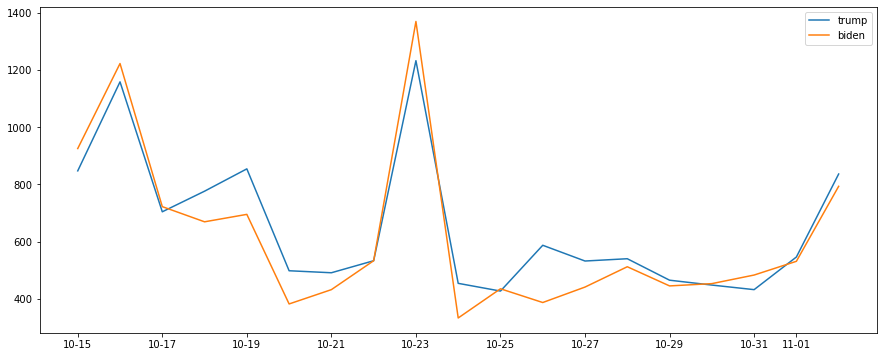

In [82]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

figure(figsize=(15, 6))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
plt.plot(trump_day['created_at'], trump_day['count'], label = 'trump')
plt.plot(biden_day['created_at'], biden_day['count'], label = 'biden')
plt.legend()
plt.show()

In [83]:
full_biden_pre['country'].unique()

NameError: name 'full_biden_pre' is not defined